# Dataanalys – Köksglädje

## Syfte
Syftet med denna analys är att undersöka försäljningsdata från Köksglädje-databasen
med hjälp av Pandas och Matplotlib. Analysen fokuserar på hur försäljningen
fördelar sig mellan butiker/städer samt hur försäljningen kan analyseras över tid.


## Datakälla och förberedelse
Datan hämtas från en SQLite-databas och läses in i Pandas. Databasen innehåller
information om transaktioner såsom datum, butik, stad och totalt försäljningsbelopp.
Efter inläsning bearbetas datan för att kunna användas i analysen.


In [2]:
import os
os.chdir("/home/elias/data_science/automated_data_pipeline")


In [19]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("database/transactions.db")

transactions = pd.read_sql("SELECT * FROM transactions", conn)
details = pd.read_sql("SELECT * FROM transaction_details", conn)

df = pd.merge(details, transactions, on="transaction_id")


## Försäljning per stad
Denna analys visar hur den totala försäljningen fördelar sig mellan olika städer.
Genom att summera försäljningen per stad går det att jämföra butiker och identifiera
skillnader i försäljningsnivå.


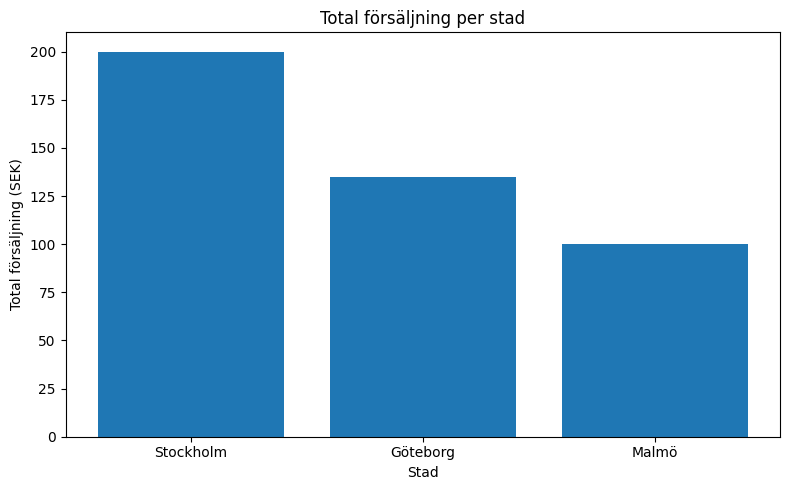

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("database/transactions.db")
df = pd.read_sql("SELECT * FROM transactions", conn)

# Om store_id saknas (None/NaN), skapa exempel-butiker
if df["store_id"].isna().all():
    df["store_id"] = [1, 2, 3]  # kopplat till dina 3 rader

# Butik -> stad
store_city = {
    1: "Stockholm",
    2: "Göteborg",
    3: "Malmö",
}

df["city"] = df["store_id"].map(store_city)

city_sales = df.groupby("city")["total_amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(city_sales.index, city_sales.values)
plt.title("Total försäljning per stad")
plt.xlabel("Stad")
plt.ylabel("Total försäljning (SEK)")
plt.tight_layout()
plt.show()

##ff


## Försäljning per veckodag
Denna visualisering analyserar hur försäljningen varierar mellan veckodagar.
Syftet är att undersöka om det finns skillnader mellan vardagar och helger.


In [5]:
import pandas as pd

details = details.copy()

details["product_id"] = details["product_id"].fillna(
    pd.Series(range(1, len(details) + 1), index=details.index)
)


/tmp/ipykernel_373502/941534507.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  details["product_id"] = details["product_id"].fillna(


In [6]:
details[["product_id", "quantity"]]
details["product_id"].isna().sum()


np.int64(0)

In [7]:
product_names = {
    1: "Stekpanna",
    2: "Kastrull",
    3: "Knivset",
    4: "Skärbräda",
    5: "Gryta"
}

details = details.copy()

details["product_name"] = details["product_id"].map(product_names)

details[["product_id", "product_name", "quantity"]]



,product_id,product_name,quantity
0,1,Stekpanna,1
1,2,Kastrull,2
2,3,Knivset,1
3,4,Skärbräda,3
4,5,Gryta,1


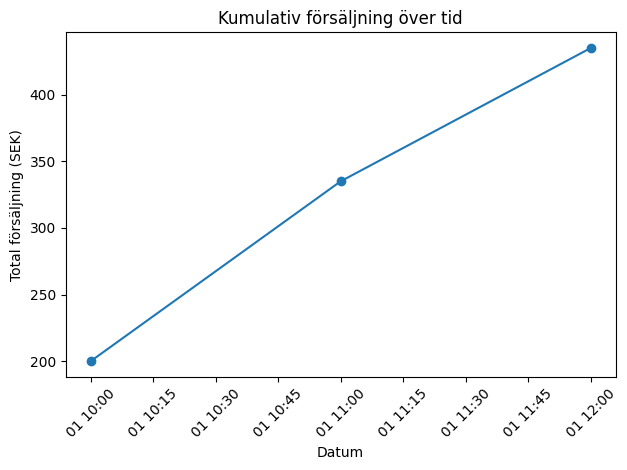

In [10]:
import matplotlib.pyplot as plt


transactions["transaction_date"] = pd.to_datetime(transactions["transaction_date"])


transactions = transactions.sort_values("transaction_date")


transactions["cumulative_sales"] = transactions["total_amount"].cumsum()


plt.figure()
plt.plot(
    transactions["transaction_date"],
    transactions["cumulative_sales"],
    marker="o"
)

plt.title("Kumulativ försäljning över tid")
plt.xlabel("Datum")
plt.ylabel("Total försäljning (SEK)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Försäljning över tid
Här analyseras försäljningen över tid. Ett rullande medelvärde används för att
jämna ut variationer och göra den underliggande utvecklingen tydligare.

Eftersom datamängden endast innehåller försäljning för en dag kan ingen tydlig
trend identifieras, men visualiseringen visar hur metoden kan användas.


Index(['transaction_id', 'transaction_date', 'customer_id', 'store_id',
       'total_amount', 'city'],
      dtype='object')

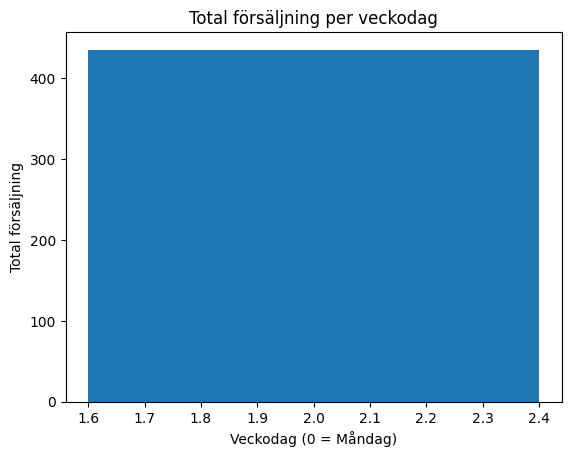

In [15]:
# Säkerställ datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
df = df.dropna(subset=['transaction_date'])

# Veckodag (0 = måndag)
df['weekday'] = df['transaction_date'].dt.weekday

weekday_sales = df.groupby('weekday')['total_amount'].sum()

plt.figure()
plt.bar(weekday_sales.index, weekday_sales.values)
plt.title('Total försäljning per veckodag')
plt.xlabel('Veckodag (0 = Måndag)')
plt.ylabel('Total försäljning')
plt.show()



### Försäljning per veckodag
Denna visualisering visar hur den totala försäljningen varierar mellan veckodagar och kan användas för att identifiera skillnader mellan vardagar och helger.


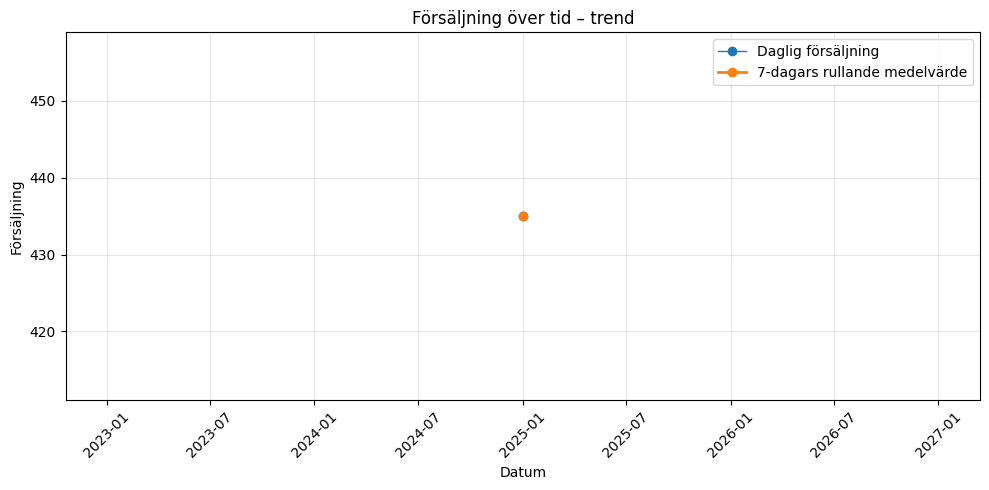

In [18]:
daily_sales = (
    df.groupby(df['transaction_date'].dt.date)['total_amount']
    .sum()
)
daily_sales.index = pd.to_datetime(daily_sales.index)
daily_sales = daily_sales.sort_index()

rolling_7 = daily_sales.rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(daily_sales, marker='o', linewidth=1, label='Daglig försäljning')
plt.plot(rolling_7, marker='o', linewidth=2, label='7-dagars rullande medelvärde')
plt.title('Försäljning över tid – trend')
plt.xlabel('Datum')
plt.ylabel('Försäljning')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Försäljningstrend över tid
Denna visualisering visar försäljningen över tid baserat på tillgänglig data. 
Eftersom datamängden endast innehåller en dag kan ingen tydlig trend identifieras, 
men visualiseringen visar hur analysen är uppbyggd och hur metoden kan användas 
för större datamängder.


## Slutsats
Analysen visar hur försäljningsdata från Köksglädje kan analyseras med hjälp av
Pandas och visualiseras med Matplotlib. Även om datamängden är begränsad visar
analysen ett strukturerat arbetssätt som kan användas för större dataset.
